# Import Libraries

#Assignment Target

Test Accuracy: 99.4

Total Number of Parameters: 8000

#Results obtained in Second Submission

Best Test Accuracy: 98.24

Number of Parameters Used: 7530

#Analysis - Receptive Field & other dimension calculations

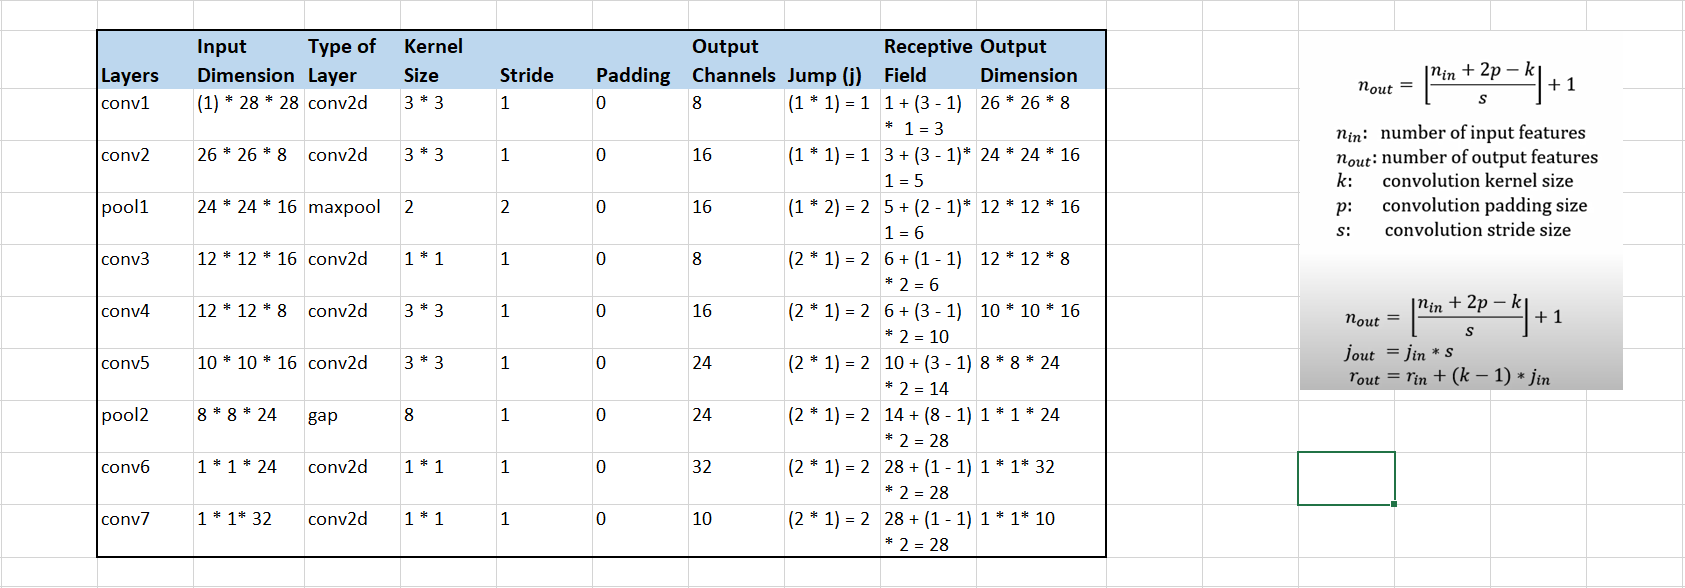

#Analysis - Train vs Test Accuracy

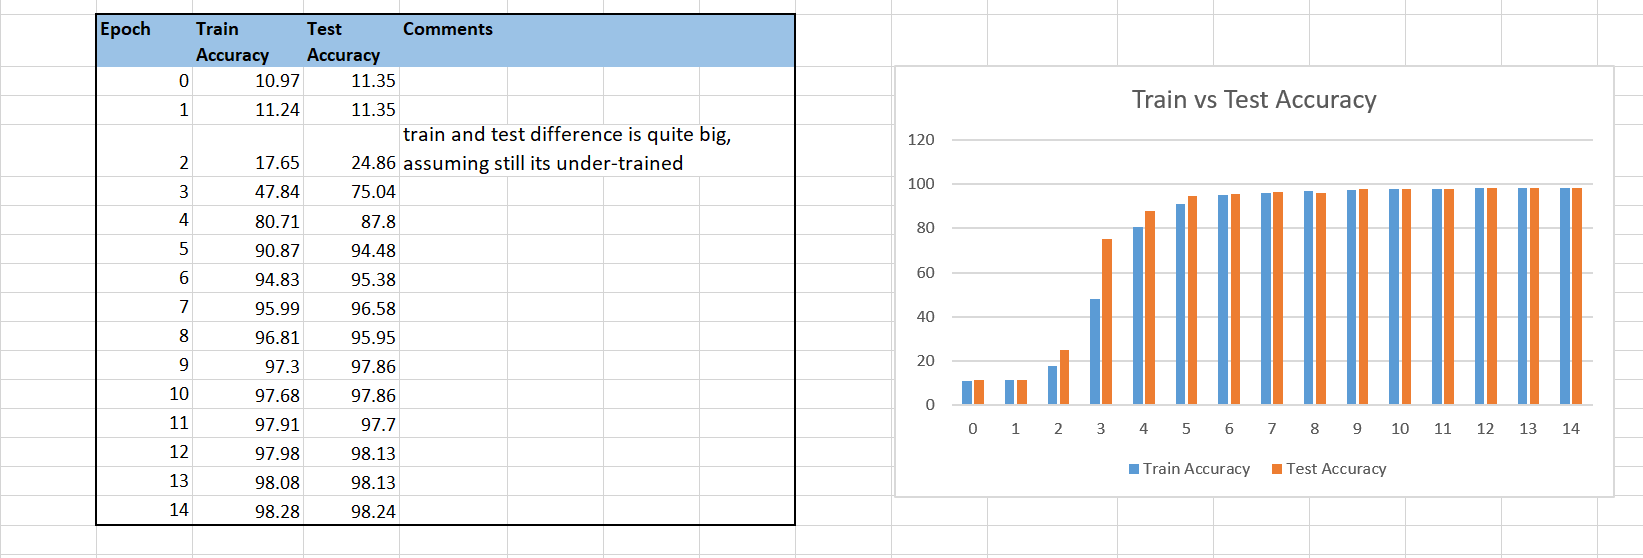

#Comments

1. If we closely follow the training and test accuracy progression, we would see that the model is learning but apparently slowly. We do not see any sign of overfitting but looks like the model is underfitted.

2. Steady increase of train and test accuracy further states that the skeleton of the model is correct, but we would have to add few more components for faster convergence.

3. At the end of last epoch, we have a training accuracy of 98.28, so the model should still learn and there is enough chance that test accuracy might improve if we take few more epochs.

4. Its good that we could keep the number of parameters below 8000. Currently the number of parameters used are 7530. We assume, this might increase a bit while we would add the batch normalization (for keeping mean, std etc.) in next set of submissions, but we hope, we would be able to keep the number of parameters within 8000.

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


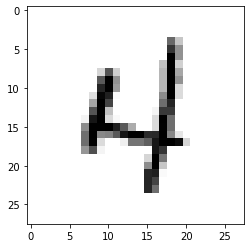

In [5]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible.

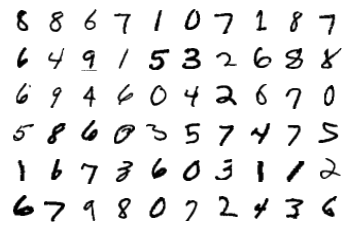

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?



In [7]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3) # 26 * 26 * 8
        self.conv2 = nn.Conv2d(8, 16, 3) # 24 * 24 * 16
        self.pool1 = nn.MaxPool2d(2, 2) # 12 * 12 * 16
        self.conv3 = nn.Conv2d(16, 8, 1) # 12 * 12 * 8

        self.conv4 = nn.Conv2d(8, 16, 3) # 10 * 10 * 16
        self.conv5 = nn.Conv2d(16, 24, 3) # 8 * 8 * 24
        self.pool2 = nn.AvgPool2d(8) # 1 * 1 * 24

        self.conv6 = nn.Conv2d(24, 32, 1) # 1 * 1 * 32
        self.conv7 = nn.Conv2d(32, 16, 1) # 1 * 1 * 16
        self.conv8 = nn.Conv2d(16, 10, 1) # 1 * 1 * 10

    def forward(self, x):
        x = self.conv3(self.pool1(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv5(F.relu(self.conv4(x)))))
        x = self.conv8(F.relu(self.conv7(F.relu(self.conv6(x)))))
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
            Conv2d-2           [-1, 16, 24, 24]           1,168
         MaxPool2d-3           [-1, 16, 12, 12]               0
            Conv2d-4            [-1, 8, 12, 12]             136
            Conv2d-5           [-1, 16, 10, 10]           1,168
            Conv2d-6             [-1, 24, 8, 8]           3,480
         AvgPool2d-7             [-1, 24, 1, 1]               0
            Conv2d-8             [-1, 32, 1, 1]             800
            Conv2d-9             [-1, 16, 1, 1]             528
           Conv2d-10             [-1, 10, 1, 1]             170
Total params: 7,530
Trainable params: 7,530
Non-trainable params: 0
-----------------------------------------------------------

# Training and Testing

In [10]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

# Let's Train and test our model

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=2.2949304580688477 Batch_id=468 Accuracy=10.97: 100%|██████████| 469/469 [00:16<00:00, 28.29it/s]



Test set: Average loss: 2.3009, Accuracy: 1135/10000 (11.35%)

EPOCH: 1


Loss=2.2900540828704834 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:15<00:00, 30.28it/s]



Test set: Average loss: 2.2992, Accuracy: 1135/10000 (11.35%)

EPOCH: 2


Loss=1.88473641872406 Batch_id=468 Accuracy=17.65: 100%|██████████| 469/469 [00:14<00:00, 32.96it/s]



Test set: Average loss: 1.9821, Accuracy: 2486/10000 (24.86%)

EPOCH: 3


Loss=0.9276673197746277 Batch_id=468 Accuracy=47.84: 100%|██████████| 469/469 [00:14<00:00, 32.59it/s]



Test set: Average loss: 0.7377, Accuracy: 7504/10000 (75.04%)

EPOCH: 4


Loss=0.3634425103664398 Batch_id=468 Accuracy=80.71: 100%|██████████| 469/469 [00:14<00:00, 32.90it/s]



Test set: Average loss: 0.3860, Accuracy: 8780/10000 (87.80%)

EPOCH: 5


Loss=0.25479447841644287 Batch_id=468 Accuracy=90.87: 100%|██████████| 469/469 [00:14<00:00, 32.58it/s]



Test set: Average loss: 0.1794, Accuracy: 9448/10000 (94.48%)

EPOCH: 6


Loss=0.06549306958913803 Batch_id=468 Accuracy=94.83: 100%|██████████| 469/469 [00:15<00:00, 30.35it/s]



Test set: Average loss: 0.1452, Accuracy: 9538/10000 (95.38%)

EPOCH: 7


Loss=0.1386694461107254 Batch_id=468 Accuracy=95.99: 100%|██████████| 469/469 [00:14<00:00, 32.80it/s]



Test set: Average loss: 0.1100, Accuracy: 9658/10000 (96.58%)

EPOCH: 8


Loss=0.052027519792318344 Batch_id=468 Accuracy=96.81: 100%|██████████| 469/469 [00:14<00:00, 33.40it/s]



Test set: Average loss: 0.1261, Accuracy: 9595/10000 (95.95%)

EPOCH: 9


Loss=0.0959506630897522 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:14<00:00, 32.75it/s]



Test set: Average loss: 0.0672, Accuracy: 9786/10000 (97.86%)

EPOCH: 10


Loss=0.04913612827658653 Batch_id=468 Accuracy=97.68: 100%|██████████| 469/469 [00:14<00:00, 32.63it/s]



Test set: Average loss: 0.0744, Accuracy: 9786/10000 (97.86%)

EPOCH: 11


Loss=0.15558584034442902 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:14<00:00, 33.17it/s]



Test set: Average loss: 0.0707, Accuracy: 9770/10000 (97.70%)

EPOCH: 12


Loss=0.10839885473251343 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:14<00:00, 33.01it/s]



Test set: Average loss: 0.0608, Accuracy: 9813/10000 (98.13%)

EPOCH: 13


Loss=0.03812249377369881 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:14<00:00, 32.79it/s]



Test set: Average loss: 0.0599, Accuracy: 9813/10000 (98.13%)

EPOCH: 14


Loss=0.08262475579977036 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:15<00:00, 30.27it/s]



Test set: Average loss: 0.0547, Accuracy: 9824/10000 (98.24%)

